# Load Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

# Load Data

In [121]:
mean_type='one_hot'
noise_type='pareto'
# algos_type='mr-ucb'
# algos_type='ape-uniform'
algos_type='ape-rademacher'
# algos_type='ape-pareto'
# algos_type='ape-frechet'
# algos_type='ucb-truncated-mean'

p=1.5
scale = 1.0
gap = 0.7
K = 10
samples=20000
n_seeds=10

total_regret_list = []
agv_regret_list = []
action_cnt = []

for seed in range(1,n_seeds):
    filename = 'multi_armed_bandit_results/grid_search_{:}-{:}-{:}-p{:.2f}-s{:.2f}-g{:.2f}-K{:d}-size{:d}-seed{:d}.npy'.format(mean_type,noise_type,algos_type,p,scale,gap,K,samples,seed)
    with open(filename,'rb') as f:
        data_per_seed=np.load(f)
        algos_name=data_per_seed['algos_name']
        total_regret_list.append(data_per_seed['total_regret_list'])
        agv_regret_list.append(data_per_seed['agv_regret_list'])
        action_cnt.append(data_per_seed['action_cnt'])

# Find The Best Hyperparameters

In [122]:
mean_avg_regret_list = np.mean(agv_regret_list,axis=0)
std_avg_regret_list = np.std(agv_regret_list,axis=0)
min_idx = np.argmin(mean_avg_regret_list[:,-1])
print('K: {:d}, Gap: {:.2f}'.format(K,gap))
print('Minimum Avg Regret: {:.6f} ({:.3f})'.format(mean_avg_regret_list[min_idx,-1],std_avg_regret_list[min_idx,-1]))
print('Alg Name: {:}'.format(algos_name[min_idx]))

K: 10, Gap: 0.70
Minimum Avg Regret: 0.347989 (0.306)
Alg Name: ape-rademacher(q:1.5,c:0.4498,u:25.73)


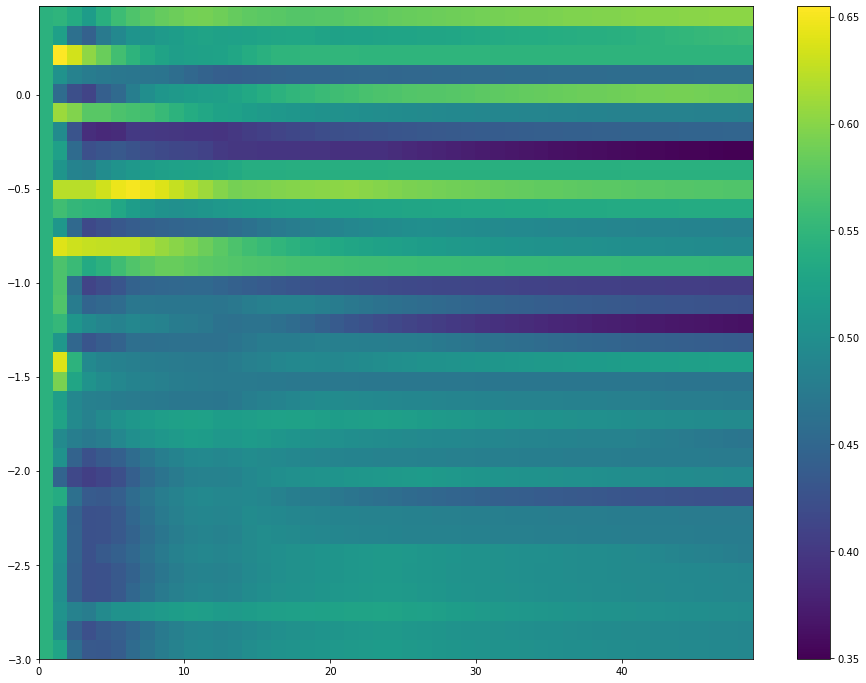

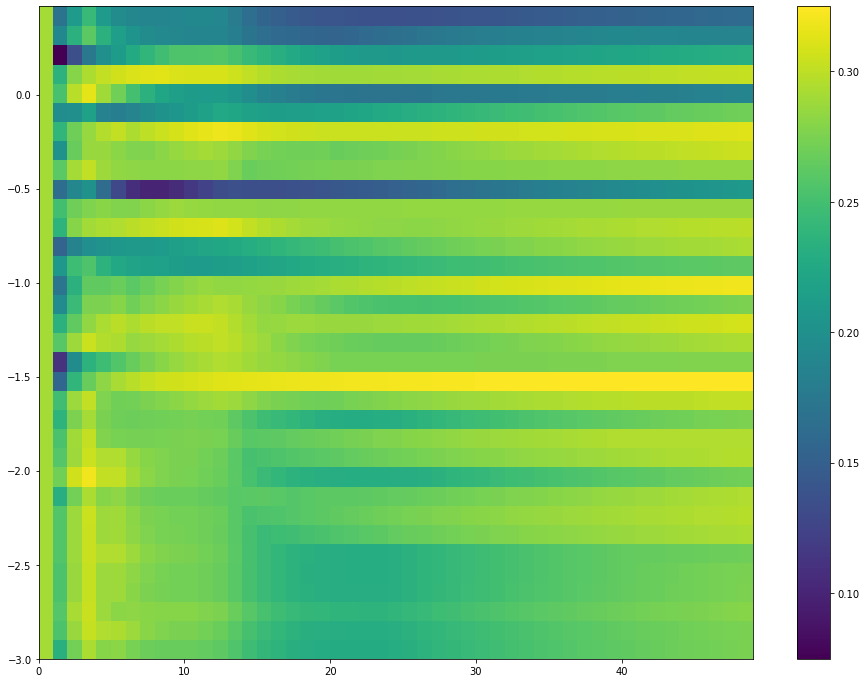

In [123]:
plt.figure(figsize=(16,12))
n = 35
m = 400
c_list = np.linspace(-3.,2.,50)
x_list = range(samples//m)
plt.pcolor(x_list,c_list[:n],mean_avg_regret_list[:n,::m])
plt.colorbar()
plt.show()

plt.figure(figsize=(16,12))
plt.pcolor(x_list,c_list[:n],std_avg_regret_list[:n,::m])
plt.colorbar()
plt.show()

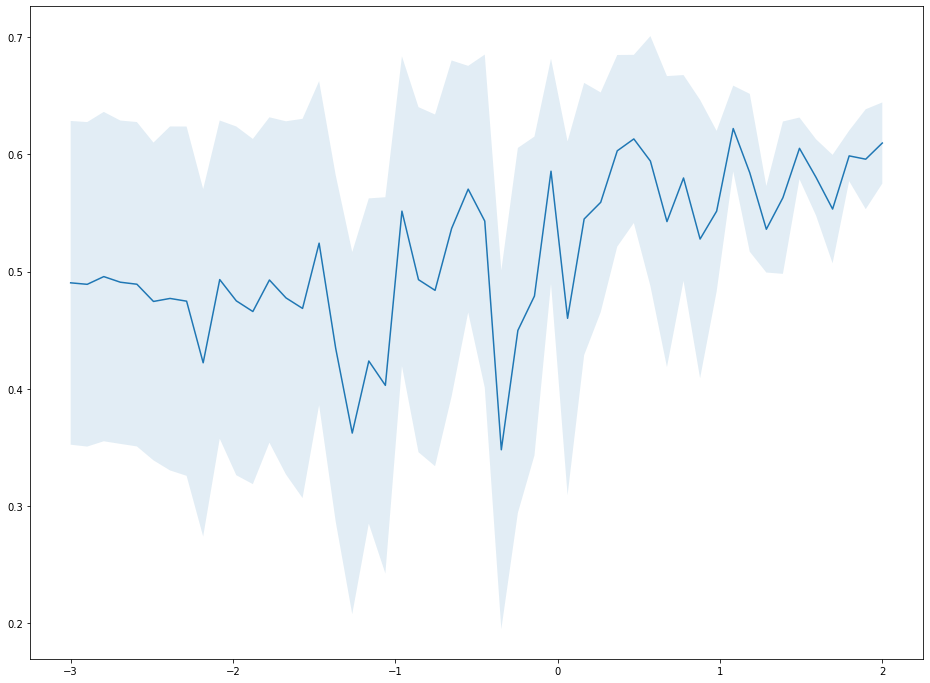

In [124]:
plt.figure(figsize=(16,12))
n = 35
m = 400
c_list = np.linspace(-3.,2.,50)
a = 0.5
plt.fill_between(c_list,mean_avg_regret_list[:,-1]-a*std_avg_regret_list[:,-1],mean_avg_regret_list[:,-1]+a*std_avg_regret_list[:,-1],alpha=0.13)
plt.plot(c_list,mean_avg_regret_list[:,-1])
plt.show()

# plt.figure(figsize=(16,12))
# plt.pcolor(x_list,c_list[:n],std_avg_regret_list[:n,::m])
# plt.colorbar()
# plt.show()